# Multilayer Perceptron Regression

We'll Perfrom Regression Using sklearn Multi-layer perceptron regression estimator on the diet dataset

dataset : https://www.kaggle.com/datasets/chrisbow/2018-calorie-exercise-and-weight-changes

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

## Exploring and Preparing our Dataset

In [2]:
diet_df= pd.read_csv("datasets/diet_data.csv")
diet_df.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [4]:
diet_df= diet_df.sample(frac=1).reset_index(drop=True)

In [5]:
diet_df.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,8/14/2018,11.0,12.0,6.0,2662.0,2400.0,0.90,1.0,1.0,0.0,0.0,0.0,0.0,-4.0
1,11/3/2018,12.0,0.0,6.0,2694.0,5350.0,1.99,0.0,0.0,1.0,0.0,0.0,0.0,14.0
2,11/24/2018,11.0,13.0,8.0,2680.0,3750.0,1.40,0.0,0.0,1.0,0.0,0.0,0.0,26.0
3,9/22/2018,12.0,0.0,6.0,2694.0,3050.0,1.13,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,9/13/2018,11.0,12.0,4.0,2660.0,6300.0,2.37,1.0,1.0,0.0,1.0,1.0,1.0,18.0
5,9/3/2018,12.0,2.0,4.0,2724.0,1800.0,0.66,0.0,1.0,0.0,0.0,0.0,0.0,-50.0
6,10/4/2018,12.0,4.0,4.0,2756.0,4300.0,1.56,1.0,1.0,0.0,1.0,0.0,0.0,-12.0
7,10/11/2018,11.0,13.0,6.0,2678.0,2900.0,1.08,1.0,1.0,0.0,0.0,0.0,1.0,28.0
8,10/3/2018,12.0,3.0,0.0,2736.0,5150.0,1.88,1.0,1.0,0.0,0.0,0.0,0.0,20.0
9,12/4/2018,12.0,0.0,2.0,2690.0,2400.0,0.89,1.0,1.0,0.0,0.0,0.0,1.0,-18.0


In [6]:
diet_df.shape

(151, 14)

In [8]:
diet_df[diet_df.isnull().any(axis=1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

In [9]:
diet_df.dropna(inplace=True)

In [10]:
diet_df[diet_df.isnull().any(axis=1)].count()


Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [11]:
diet_df.shape

(140, 14)

In [13]:
diet_df.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


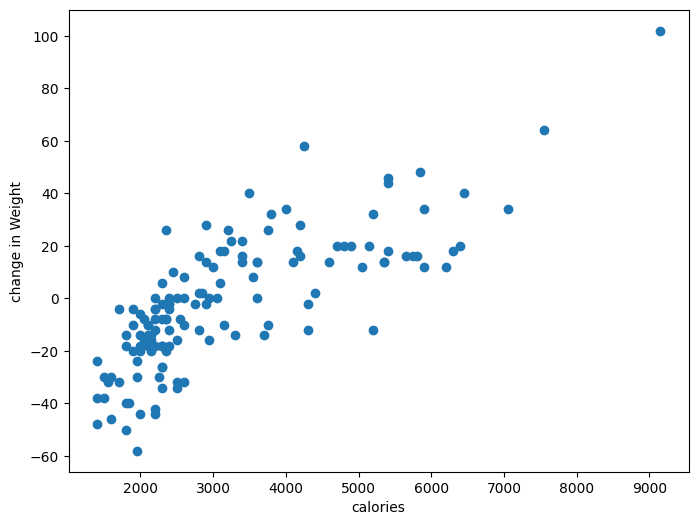

In [16]:
fig,  ax= plt.subplots(figsize=(8,6))

plt.scatter(diet_df['calories'],diet_df['change'])

plt.xlabel('calories')
plt.ylabel('change in Weight')
plt.show()

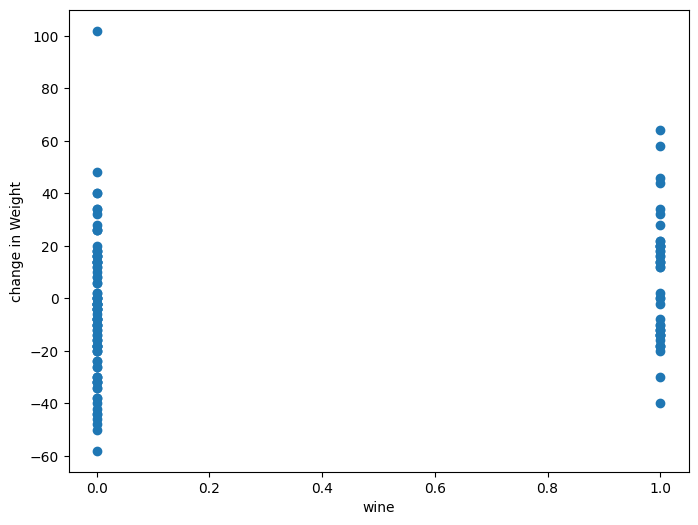

In [17]:
fig,  ax= plt.subplots(figsize=(8,6))

plt.scatter(diet_df['wine'],diet_df['change'])

plt.xlabel('wine')
plt.ylabel('change in Weight')
plt.show()

In [19]:
diet_corr= diet_df.corr(numeric_only=True)
diet_corr

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387
prot,-0.133707,0.135703,0.040839,-0.089135,0.073819,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,0.035156


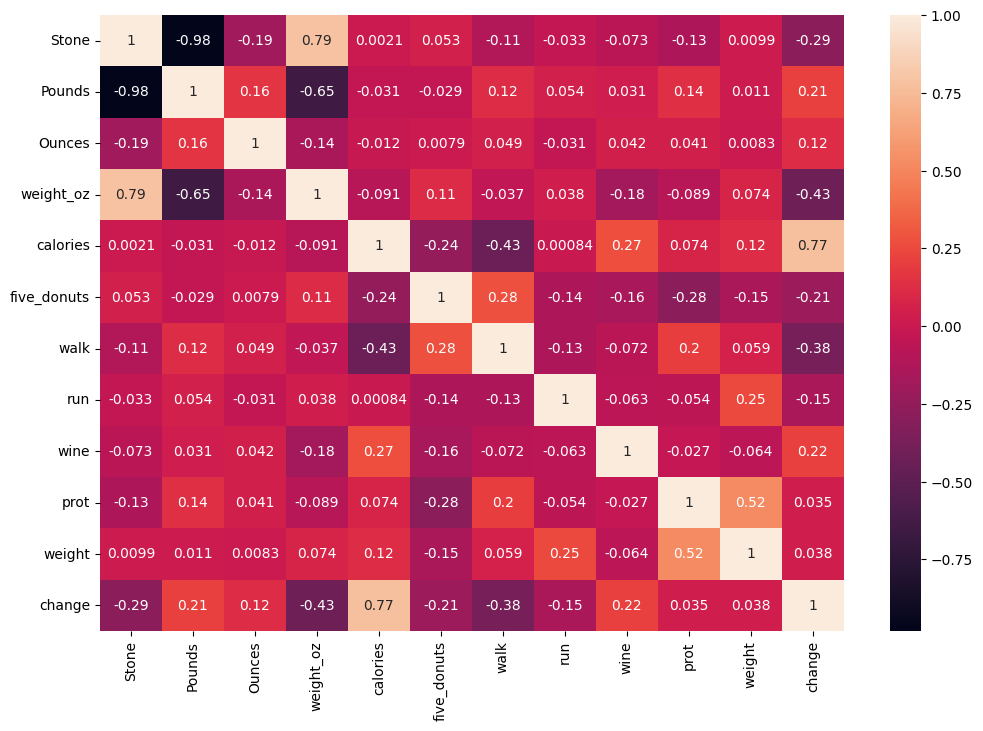

In [25]:
fig, ax= plt.subplots(figsize=(12,8))
sns.heatmap(diet_corr,annot=True);

In [27]:
from sklearn.model_selection import train_test_split

X= diet_df.drop(['change','Date','Stone','Pounds','Ounces'],axis=1)
Y= diet_df['change']

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [29]:
x_train.sample(3)

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight
83,2706.0,6400.0,2.37,0.0,0.0,0.0,1.0,0.0,0.0
37,2692.0,2150.0,0.80,0.0,1.0,0.0,0.0,0.0,0.0
109,2736.0,1600.0,0.58,1.0,1.0,1.0,0.0,0.0,1.0


## Standarization

In [31]:
from sklearn.preprocessing import StandardScaler

scaller= StandardScaler()
scaller.fit(x_train)
x_train= scaller.transform(x_train)
x_test= scaller.transform(x_test)



## Build and Train Neural Netwrok using MLP Regressor

In [32]:
from sklearn.neural_network import MLPRegressor

In [170]:
mlp_reg= MLPRegressor(activation='relu',
                      hidden_layer_sizes=(1,),
                      solver='lbfgs',
                      verbose=0,
                      max_iter=100)


`lbfgs` optimizer used to trian the NN 
this Optimizer converges well for small dataset

In [171]:
mlp_reg.fit(x_train,y_train)

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(1,), max_iter=100, solver='lbfgs', verbose=0)

## Evaluate our model

In [172]:
y_pred= mlp_reg.predict(x_test)

In [173]:
from sklearn.metrics import r2_score

In [174]:
mlp_reg.score(x_train,y_train)

0.7436543157410943

In [175]:
r2_score(y_test,y_pred)

0.7724390119631177

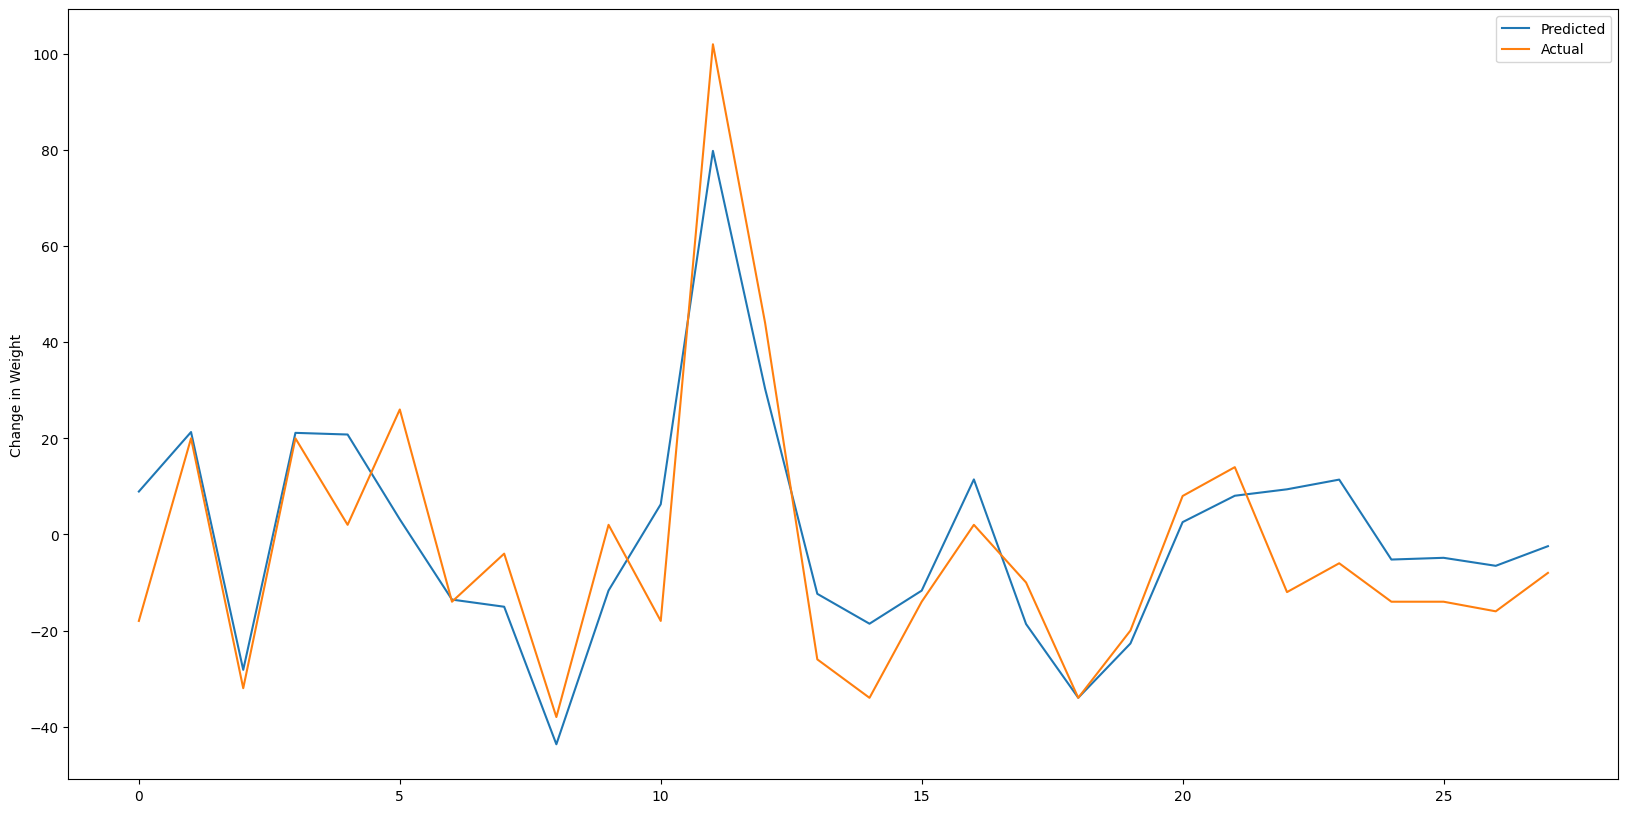

In [176]:
plt.figure(figsize=(20,10))

plt.plot(y_pred,label="Predicted")
plt.plot(y_test.values,label='Actual')

plt.ylabel("Change in Weight")

plt.legend()
plt.show()